In [1]:
import requests
import json
import xarray as xr
import datetime
from ipywidgets import interact, widgets, interactive
from IPython.display import display
import pandas as pd
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
VIS_body = {
        "query_parameters": [
            {
                "column_name": 'measuredvalue',
                "alias": 'measuredvalue'
            },
            {
                "column_name": 'parameter',
                "alias": 'parameter'
            },
            {
                "column_name": 'Species',
                "alias": 'Species'
            },
            {
                "column_name": "measuredunit",
                "alias": "measuredunit"
            },
            {
                "column_name": "parametertype",
                "alias": "parametertype"
            },
            {
                "column_name": "quantity",
                "alias": "quantity"
            },
            {
                "column_name": "collectiondate",
                "alias": "collectiondate"
            },
            {
                "column_name": "longitude",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "latitude",
                "alias": "LATITUDE"
            },
            {
                "column_name": "wmr_area_code",
                "alias": "wmr_area_code"
            },
            {
                "column_name": "wkt",
                "alias": "wkt"
            },
            {
                "column_name": "wmr_waterbody_krw",
                "alias": "wmr_waterbody_krw"
            },
            {
                "column_name": "aggregate",
                "alias": "aggregate"
            },
            {
                "column_name": "changedate",
                "alias": "changedate"
            },
            {
                "column_name": "compartment",
                "alias": "compartment"
            },
            {
                "column_name": "ctd_update",
                "alias": "ctd_update"
            },
            {
                "column_name": "calculatedunit",
                "alias": "calculatedunit"
            },
            {
                "column_name": "calculatedvalue",
                "alias": "calculatedvalue"
            },
            {
                "column_name": "measurementsetnumber",
                "alias": "measurementsetnumber"
            },
            {
                "column_name": "samplingdevice",
                "alias": "samplingdevice"
            },
            {
                "column_name": "organisation",
                "alias": "organisation"
            },
            {
                "column_name": "sourcesystem",
                "alias": "sourcesystem"
            },
            {
                "column_name": "status",
                "alias": "status"
            },
            {
                "column_name": "taxontype",
                "alias": "taxontype"
            },
            {
                "column_name": "id",
                "alias": "id"
            },
            {
                "column_name": "AphiaID",
                "alias": "AphiaID"
            },
            {
                "column_name": "AphiaID_accepted",
                "alias": "AphiaID_accepted"
            }],
            "filters": [
            {
              "for_query_parameter": "LONGITUDE",
              "min": 3,
              "max": 7
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 50,
              "max": 54
            },
            {
              "for_query_parameter": "quantity",
              "eq": "LENGTE"
            }                  
            ],
            "output": {
                "format": "csv"
        }}

# ["Authority",  "Authority_accepted",  "Class",  "Family",  "Genus",  "Kingdom",  "LSID",  "Match type",  "Order",  "Phylum",  "Qualitystatus",  "ScientificName",  "ScientificName_accepted",  "Subgenus",  "Subspecies",  "TSN",  "Taxon status",
#   "geom",  "id",  "isBrackish",  "isFresh",  "isMarine",  "isTerrestrial",]

In [3]:
VIS_response = requests.post("https://beacon-poc-vis-monitoring.maris.nl/api/query", json.dumps(VIS_body), headers = {
    'Content-type': 'application/json'
})
open('./Vis.csv', 'wb').write(VIS_response.content)
df_VIS = pd.read_csv('Vis.csv')
df_VIS

,measuredvalue,parameter,Species,measuredunit,parametertype,quantity,collectiondate,LONGITUDE,LATITUDE,wmr_area_code,wkt,wmr_waterbody_krw,aggregate,changedate,compartment,ctd_update,calculatedunit,calculatedvalue,measurementsetnumber,samplingdevice,organisation,sourcesystem,status,taxontype,id,AphiaID,AphiaID_accepted,dataset_id
0,0.104,Gymnocephalus cernua,cernua,m,Taxon,LENGTE,2009-03-10,5.93038,51.97057,bone,Point(5.93038 51.97057),"Nederrijn, Lek",No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,556476.0,Boomkor03k,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,14701365.L,405451.0,405451.0,1
1,0.110,Gymnocephalus cernua,cernua,m,Taxon,LENGTE,2009-03-10,5.93038,51.97057,bone,Point(5.93038 51.97057),"Nederrijn, Lek",No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,556476.0,Boomkor03k,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,14701366.L,405451.0,405451.0,1
2,0.106,Sander lucioperca,lucioperca,m,Taxon,LENGTE,2009-03-10,5.93038,51.97057,bone,Point(5.93038 51.97057),"Nederrijn, Lek",No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,556476.0,Boomkor03k,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,14701367.L,151308.0,151308.0,1
3,0.108,Sander lucioperca,lucioperca,m,Taxon,LENGTE,2009-03-10,5.93038,51.97057,bone,Point(5.93038 51.97057),"Nederrijn, Lek",No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,556476.0,Boomkor03k,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,14701368.L,151308.0,151308.0,1
4,0.111,Sander lucioperca,lucioperca,m,Taxon,LENGTE,2009-03-10,5.93038,51.97057,bone,Point(5.93038 51.97057),"Nederrijn, Lek",No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,556476.0,Boomkor03k,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,14701369.L,151308.0,151308.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457712,0.059,Osmerus eperlanus,eperlanus,m,Taxon,LENGTE,2000-11-22,5.15000,52.59583,MM,Point(5.15 52.59583),Markermeer,No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,188459.0,Wonderkuil,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,5069859.L,126736.0,126736.0,1
457713,0.060,Osmerus eperlanus,eperlanus,m,Taxon,LENGTE,2000-11-22,5.15000,52.59583,MM,Point(5.15 52.59583),Markermeer,No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,188459.0,Wonderkuil,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,5069860.L,126736.0,126736.0,1
457714,0.061,Osmerus eperlanus,eperlanus,m,Taxon,LENGTE,2000-11-22,5.15000,52.59583,MM,Point(5.15 52.59583),Markermeer,No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,188459.0,Wonderkuil,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,5069861.L,126736.0,126736.0,1
457715,0.062,Osmerus eperlanus,eperlanus,m,Taxon,LENGTE,2000-11-22,5.15000,52.59583,MM,Point(5.15 52.59583),Markermeer,No,2023-08-28T12:28:26.071356,OW,2024-06-28T10:16:01.000,NaN,NaN,188459.0,Wonderkuil,Wageningen universiteit en onderzoeksinstituten,WUR-WMR-AQP,65,VISSN,5069862.L,126736.0,126736.0,1


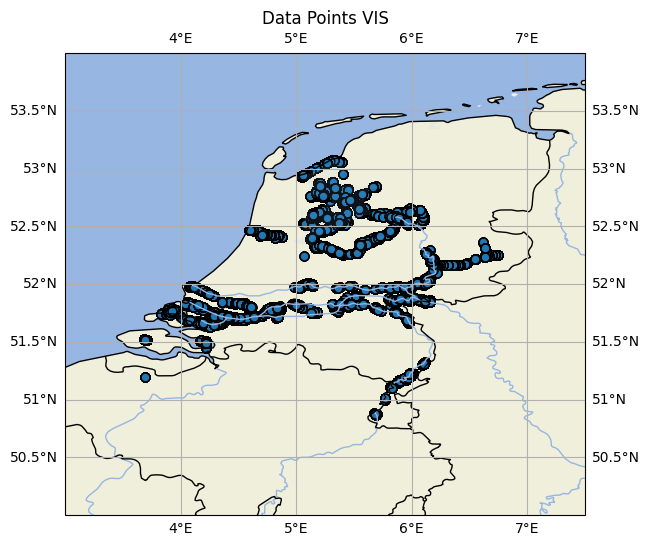

In [4]:
# Create a Cartopy plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([3, 7.5, 50, 54], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_VIS['LONGITUDE'], df_VIS['LATITUDE'], s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# # 
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a title
plt.title('Data Points VIS')

# Show the plot
plt.show()

In [5]:
Aquadesk_noordzee_body = {
        "query_parameters": [
            {
                "column_name": "Waarde_Gemeten",
                "alias": "Waarde_Gemeten"
            },
            {
                "column_name": "Waarde_Berekend",
                "alias": "Waarde_Berekend"
            },
            {
                "column_name": "Species",
                "alias": "Species"
            },
            {
                "column_name": "latitude",
                "alias": "LATITUDE"
            },
            {
                "column_name": "longitude",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "Grootheid_Code",
                "alias": "Grootheid_Code"
            },
            {
                "column_name": 'Meting_DatumTijd',
                "alias": 'Meting_DatumTijd'
            },
            {
                "column_name": "Collectie_DatumTijd",
                "alias": "Collectie_DatumTijd"
            },
            {
                "column_name": "Parameter_Type",
                "alias": "Parameter_Type"
            },
            {
                "column_name": "Subspecies",
                "alias": "Subspecies"
            },
            {
                "column_name": "Subgenus",
                "alias": "Subgenus"
            },
            {
                "column_name": "Compartiment_Code",
                "alias": "Compartiment_Code"
            },
            {
                "column_name": "Classificatie_Code",
                "alias": "Classificatie_Code"
            },
            {
                "column_name": "Eenheid_Gemeten",
                "alias": "Eenheid_Gemetene"
            },
            {
                "column_name": "Eenheid_Berekend",
                "alias": "Eenheid_Berekend"
            },
            {
                "column_name": "Meetobject_Code",
                "alias": "Meetobject_Code"
            },
            {
                "column_name": "Parameter_Specificatie",
                "alias": "Parameter_Specificatie"
            },
            {
                "column_name": "Parameter_Kenmerken",
                "alias": "Parameter_Kenmerken"
            },
            {
                "column_name": "Collectie_Referentie",
                "alias": "Collectie_Referentie"
            },
            {
                "column_name": "Doelstelling_Code",
                "alias": "Doelstelling_Code"
            },
            {
                "column_name": "Ecotoop_Codes",
                "alias": "Ecotoop_Codes"
            },
            {
                "column_name": "Geografie_Datum",
                "alias": "Geografie_Datum"
            },
            {
                "column_name": "Geografie_Vorm",
                "alias": "Geografie_Vorm"
            },
            {
                "column_name": "Geografie_Notatie",
                "alias": "Geografie_Notatie"
            },
            {
                "column_name": "Limiet_Symbool",
                "alias": "Limiet_Symbool"
            },
            {
                "column_name": "Meetpakket_Code",
                "alias": "Meetpakket_Code"
            },
            {
                "column_name": "Meetset_Nummer",
                "alias": "Meetset_Nummer"
            },
            {
                "column_name": "Meting_Correlatie",
                "alias": "Meting_Correlatie"
            },
            {
                "column_name": "Notitie_Code",
                "alias": "Notitie_Code"
            },
            {
                "column_name": "Notitie_Tekst",
                "alias": "Notitie_Tekst"
            },
            {
                "column_name": "Organisatie_Codes",
                "alias": "Organisatie_Codes"
            },
            {
                "column_name": "Proces_Instantie_Codes",
                "alias": "Proces_Instantie_Codes"
            },
            {
                "column_name": "Project_Code",
                "alias": "Project_Code"
            },
            {
                "column_name": "Status_Code",
                "alias": "Status_Code"
            },
            {
                "column_name": "Verrichting_Methoden",
                "alias": "Verrichting_Methoden"
            }],
            "filters": [
            {
              "for_query_parameter": "LONGITUDE",
              "min": 3,
              "max": 7
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 50,
              "max": 54
            },
            {
              "for_query_parameter": "Grootheid_Code",
              "eq": "LENGTE"
            }
            ],
            "output": {
                "format": "csv"
        }}

In [6]:
Aquadesk_noordzee_response = requests.post("https://beacon-poc-aquadesk-noordzee.maris.nl/api/query", json.dumps(Aquadesk_noordzee_body), headers = {
    'Content-type': 'application/json'
})
open('./Aquadesk_noordzee.csv', 'wb').write(Aquadesk_noordzee_response.content)
df_Aquadesk_noordzee = pd.read_csv('Aquadesk_noordzee.csv', low_memory=False)
df_Aquadesk_noordzee

,Waarde_Gemeten,Waarde_Berekend,Species,LATITUDE,LONGITUDE,Grootheid_Code,Meting_DatumTijd,Collectie_DatumTijd,Parameter_Type,Subspecies,Subgenus,Compartiment_Code,Classificatie_Code,Eenheid_Gemetene,Eenheid_Berekend,Meetobject_Code,Parameter_Specificatie,Parameter_Kenmerken,Collectie_Referentie,Doelstelling_Code,Ecotoop_Codes,Geografie_Datum,Geografie_Vorm,Geografie_Notatie,Limiet_Symbool,Meetpakket_Code,Meetset_Nummer,Meting_Correlatie,Notitie_Code,Notitie_Tekst,Organisatie_Codes,Proces_Instantie_Codes,Project_Code,Status_Code,Verrichting_Methoden,dataset_id
0,3.0,4.2,gibba,53.92427,5.16530,LENGTE,\t16-06-1998 10:10:00,\t16-06-1998 10:10,MACEV,NaN,NaN,BS,NaN,n,mm,\tNRDZE_0039,Corbula gibba,ST=GEM,1998NZ0823,MT,NaN,EPSG:4258,POINT(5.1653 53.92427),WKT,NaN,ME.LT,576716,NaN,NaN,NaN,"ORG=RWS,SUP=ECS","CHK=RWS,ANA=NIOZ,SMP=RWS_DGW",MWTL_MZB_Boxcorer,65,"MM=MACEV_S520,AM=MACEV_A520",1
1,6.0,4.0,cylindracea,53.92427,5.16530,LENGTE,\t16-06-1998 10:10:00,\t16-06-1998 10:10,MACEV,NaN,NaN,BS,NaN,n,mm,\tNRDZE_0039,Cylichna cylindracea,ST=GEM,1998NZ0823,MT,NaN,EPSG:4258,POINT(5.1653 53.92427),WKT,NaN,ME.LT,576716,NaN,NaN,NaN,"ORG=RWS,SUP=ECS","CHK=RWS,ANA=NIOZ,SMP=RWS_DGW",MWTL_MZB_Boxcorer,65,"MM=MACEV_S520,AM=MACEV_A520",1
2,3.0,21.3,cordatum,53.92427,5.16530,LENGTE,\t16-06-1998 10:10:00,\t16-06-1998 10:10,MACEV,NaN,NaN,BS,NaN,n,mm,\tNRDZE_0039,Echinocardium cordatum,ST=GEM,1998NZ0823,MT,NaN,EPSG:4258,POINT(5.1653 53.92427),WKT,NaN,ME.LT,576716,NaN,NaN,NaN,"ORG=RWS,SUP=ECS","CHK=RWS,ANA=NIOZ,SMP=RWS_DGW",MWTL_MZB_Boxcorer,65,"MM=MACEV_S520,AM=MACEV_A520",1
3,6.0,3.5,nitidosa,53.92427,5.16530,LENGTE,\t16-06-1998 10:10:00,\t16-06-1998 10:10,MACEV,NaN,NaN,BS,NaN,n,mm,\tNRDZE_0039,Nucula nitidosa,ST=GEM,1998NZ0823,MT,NaN,EPSG:4258,POINT(5.1653 53.92427),WKT,NaN,ME.LT,576716,NaN,NaN,NaN,"ORG=RWS,SUP=ECS","CHK=RWS,ANA=NIOZ,SMP=RWS_DGW",MWTL_MZB_Boxcorer,65,"MM=MACEV_S520,AM=MACEV_A520",1
4,7.0,7.7,albida,53.92427,5.16530,LENGTE,\t16-06-1998 10:10:00,\t16-06-1998 10:10,MACEV,NaN,NaN,BS,NaN,n,mm,\tNRDZE_0039,Ophiura albida,ST=GEM,1998NZ0823,MT,NaN,EPSG:4258,POINT(5.1653 53.92427),WKT,NaN,ME.LT,576716,NaN,NaN,NaN,"ORG=RWS,SUP=ECS","CHK=RWS,ANA=NIOZ,SMP=RWS_DGW",MWTL_MZB_Boxcorer,65,"MM=MACEV_S520,AM=MACEV_A520",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,2.0,2.0,amurensis,51.38787,3.86732,LENGTE,\t21-09-2021 08:39:00,\t21-09-2021 08:39,MACEV,NaN,NaN,BS,NaN,n,mm,\tWSTSDE_02558,Potamocorbula amurensis,NaN,2021EASD00206,MT,ZES.1=Z2.222,EPSG:4258,POINT(3.86732 51.38787),WKT,NaN,ME.LT,144175,NaN,NaN,NaN,"ORG=RWS,SUP=EAS","CHK=RWS,ANA=EAS,SMP=EAS",MWTL_MZB,65,"MM=MACEV_S536,AM=MACEV_A533",1
4623,1.0,3.0,amurensis,51.38787,3.86732,LENGTE,\t21-09-2021 08:39:00,\t21-09-2021 08:39,MACEV,NaN,NaN,BS,NaN,n,mm,\tWSTSDE_02558,Potamocorbula amurensis,NaN,2021EASD00206,MT,ZES.1=Z2.222,EPSG:4258,POINT(3.86732 51.38787),WKT,NaN,ME.LT,144175,NaN,NaN,NaN,"ORG=RWS,SUP=EAS","CHK=RWS,ANA=EAS,SMP=EAS",MWTL_MZB,65,"MM=MACEV_S536,AM=MACEV_A533",1
4624,19.0,2.0,plana,51.38787,3.86732,LENGTE,\t21-09-2021 08:39:00,\t21-09-2021 08:39,MACEV,NaN,NaN,BS,NaN,n,mm,\tWSTSDE_02558,Scrobicularia plana,NaN,2021EASD00206,MT,ZES.1=Z2.222,EPSG:4258,POINT(3.86732 51.38787),WKT,NaN,ME.LT,144175,NaN,NaN,NaN,"ORG=RWS,SUP=EAS","CHK=RWS,ANA=EAS,SMP=EAS",MWTL_MZB,65,"MM=MACEV_S536,AM=MACEV_A533",1
4625,14.0,1.0,plana,51.38787,3.86732,LENGTE,\t21-09-2021 08:39:00,\t21-09-2021 08:39,MACEV,NaN,NaN,BS,NaN,n,mm,\tWSTSDE_02558,Scrobicularia plana,NaN,2021EASD00206,MT,ZES.1=Z2.222,EPSG:4258,POINT(3.86732 51.38787),WKT,NaN,ME.LT,144175,NaN,NaN,NaN,"ORG=RWS,SUP=EAS","CHK=RWS,ANA=EAS,SMP=EAS",MWTL_MZB,65,"MM=MACEV_S536,AM=MACEV_A533",1


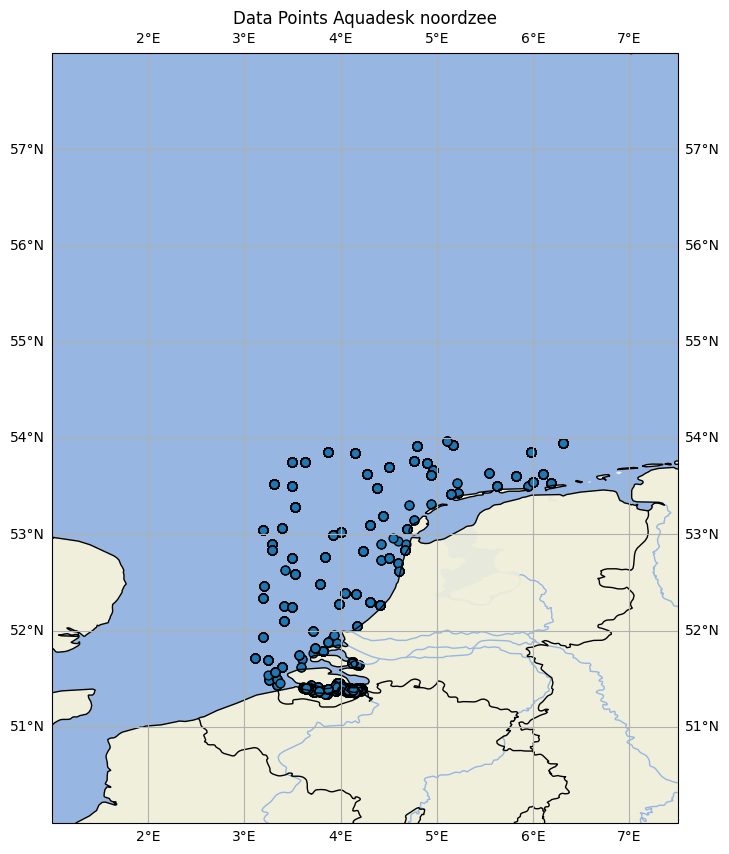

In [7]:
# Create a Cartopy plot
fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([1, 7.5, 50, 58], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_Aquadesk_noordzee['LONGITUDE'], df_Aquadesk_noordzee['LATITUDE'], s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# # 
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a title
plt.title('Data Points Aquadesk noordzee')

# Show the plot
plt.show()

In [8]:
WMR_body = {
        "query_parameters": [
            {
                "column_name": "numeriekewaarde",
                "alias": "numeriekewaarde"
            },
            {
                "column_name": "resultaatdatum",
                "alias": "resultaatdatum"
            },
            {
                "column_name": "Species",
                "alias": "Species"
            },
            {
                "column_name": "latitude",
                "alias": "LATITUDE"
            },
            {
                "column_name": "longitude",
                "alias": "LONGITUDE"
            },
            {
                "column_name": 'eenheid_code',
                "alias": 'eenheid_code'
            },
            {
                "column_name": "monsternemingsdatum",
                "alias": "monsternemingsdatum"
            },
            {
                "column_name": "hoedanigheid_code",
                "alias": "hoedanigheid_code"
            },
            {
                "column_name": "grootheid_code",
                "alias": "grootheid_code"
            },
            {
                "column_name": "parameter_groep",
                "alias": "parameter_groep"
            },
            {
                "column_name": "parameter_omschrijving",
                "alias": "parameter_omschrijving"
            },
            {
                "column_name": "bemonsteringsmethode_code",
                "alias": "bemonsteringsmethode_code"
            },
            {
                "column_name": "monsternemingstijd",
                "alias": "monsternemingstijd"
            },
            {
                "column_name": "bemonsteringsapparaat_code",
                "alias": "bemonsteringsapparaat_code"
            },
            {
                "column_name": "wmr_datagroup_m",
                "alias": "wmr_datagroup_m"
            },
            {
                "column_name": "wmr_datagroup_t",
                "alias": "wmr_datagroup_t"
            },
            {
                "column_name": "begindatum",
                "alias": "begindatum"
            },
            {
                "column_name": "begintijd",
                "alias": "begintijd"
            },
            {
                "column_name": "FID",
                "alias": "FID"
            },
            {
                "column_name": "bemonsteringsapparaat_codespace",
                "alias": "bemonsteringsapparaat_codespace"
            },
            {
                "column_name": "bemonsteringsmethode_codespace",
                "alias": "bemonsteringsmethode_codespace"
            },
            {
                "column_name": "compartiment_code",
                "alias": "compartiment_code"
            },
            {
                "column_name": "einddatum",
                "alias": "einddatum"
            },
            {
                "column_name": "geometriepunt_x",
                "alias": "geometriepunt_x"
            },
            {
                "column_name": "geometriepunt_y",
                "alias": "geometriepunt_y"
            },
            {
                "column_name": "kwaliteitsoordeel_code",
                "alias": "kwaliteitsoordeel_code"
            },
            {
                "column_name": "ident_m",
                "alias": "ident_m"
            },
            {
                "column_name": "ident_t",
                "alias": "ident_t"
            },
            {
                "column_name": "meetpunt_identificatie",
                "alias": "meetpunt_identificatie"
            },
            {
                "column_name": "referentiehorizontaal_code",
                "alias": "referentiehorizontaal_code"
            },
            {
                "column_name": "waardebepalingsmethode_code",
                "alias": "waardebepalingsmethode_code"
            },
            {
                "column_name": "waardebepalingsmethode_codespace",
                "alias": "waardebepalingsmethode_codespace"
            },
            {
                "column_name": "waardebewerkingsmethode_code",
                "alias": "waardebewerkingsmethode_code"
            },
            {
                "column_name": "waardebewerkingsmethode_codespace",
                "alias": "waardebewerkingsmethode_codespace"
            },
            {
                "column_name": "wmr_aphia_m",
                "alias": "wmr_aphia_m"
            },
            {
                "column_name": "wmr_aphiaid_t",
                "alias": "wmr_aphiaid_t"
            },
            {
                "column_name": "wmr_datacluster_m",
                "alias": "wmr_datacluster_m"
            },
            {
                "column_name": "wmr_fcname",
                "alias": "wmr_fcname"
            },
            {
                "column_name": "wmr_giscode",
                "alias": "wmr_giscode"
            },
            {
                "column_name": "wmr_gisid",
                "alias": "wmr_gisid"
            },
            {
                "column_name": "wmr_point",
                "alias": "wmr_point"
            },
            {
                "column_name": "wmr_year_m",
                "alias": "wmr_year_m"
            },
            {
                "column_name": "wmr_year_t",
                "alias": "wmr_year_t"
            },
            {
                "column_name": "AphiaID_accepted",
                "alias": "AphiaID_accepted"
            }],
            "filters": [
            {
              "for_query_parameter": "LONGITUDE",
              "min": 3,
              "max": 7
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 50,
              "max": 54
            },
            {
              "for_query_parameter": "grootheid_code",
              "eq": "LENGTE"
            }
            ],
            "output": {
                "format": "csv"
        }}


# "Authority","Authority_accepted",  "Biotaxon",  "Class",  "FID",  "Family",  "Genus",  "Kingdom",  "LSID",  "Match type",  "Order",  "Phylum",  "Qualitystatus",  "ScientificName",  "ScientificName_accepted".  "Subgenus",  "Subspecies",  "TSN",  "Taxon status",

In [9]:
WMR_response = requests.post("https://beacon-poc-wmr.maris.nl/api/query", json.dumps(WMR_body), headers = {
    'Content-type': 'application/json'
})
open('./WMR.csv', 'wb').write(WMR_response.content)
df_WMR = pd.read_csv('WMR.csv', low_memory=False)
df_WMR

,numeriekewaarde,resultaatdatum,Species,LATITUDE,LONGITUDE,eenheid_code,monsternemingsdatum,hoedanigheid_code,grootheid_code,parameter_groep,parameter_omschrijving,bemonsteringsmethode_code,monsternemingstijd,bemonsteringsapparaat_code,wmr_datagroup_m,wmr_datagroup_t,begindatum,begintijd,FID,bemonsteringsapparaat_codespace,bemonsteringsmethode_codespace,compartiment_code,einddatum,geometriepunt_x,geometriepunt_y,kwaliteitsoordeel_code,ident_m,ident_t,meetpunt_identificatie,referentiehorizontaal_code,waardebepalingsmethode_code,waardebepalingsmethode_codespace,waardebewerkingsmethode_code,waardebewerkingsmethode_codespace,wmr_aphia_m,wmr_aphiaid_t,wmr_datacluster_m,wmr_fcname,wmr_giscode,wmr_gisid,wmr_point,wmr_year_m,wmr_year_t,AphiaID_accepted,dataset_id
0,16.00,1998-04-23,elliptica,52.833333,4.375000,mm,1998-04-23,NVT,LENGTE,Biotaxon,Spisula elliptica,Perdon & Troost 2012. CVO rapport: 12.006,10:27,Bodemschaaf,SD,SD,1998-04-23,10:27,SD_All_OD_Geo_view.fid-40b40be6_1928b9ade74_-6a6,www.imares.nl,www.imares.nl,BS,NaN,4.375000,52.833333,0,IMA1998_1478,IMA1998_19035T140300Q211352C1,NL80_KUSTZONE_OV,EPSG:4230,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,NaN,NaN,NaN,140300.0,IHM-KRM,NaN,NaN,1478,POINT (4.375 52.8333333333333),1998,1998,140300.0,1
1,18.00,1998-04-23,elliptica,52.833333,4.375000,mm,1998-04-23,NVT,LENGTE,Biotaxon,Spisula elliptica,Perdon & Troost 2012. CVO rapport: 12.006,10:27,Bodemschaaf,SD,SD,1998-04-23,10:27,SD_All_OD_Geo_view.fid-40b40be6_1928b9ade74_-6a5,www.imares.nl,www.imares.nl,BS,NaN,4.375000,52.833333,0,IMA1998_1478,IMA1998_19035T140300Q211353C1,NL80_KUSTZONE_OV,EPSG:4230,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,NaN,NaN,NaN,140300.0,IHM-KRM,NaN,NaN,1478,POINT (4.375 52.8333333333333),1998,1998,140300.0,1
2,23.00,1998-04-23,elliptica,52.833333,4.375000,mm,1998-04-23,NVT,LENGTE,Biotaxon,Spisula elliptica,Perdon & Troost 2012. CVO rapport: 12.006,10:27,Bodemschaaf,SD,SD,1998-04-23,10:27,SD_All_OD_Geo_view.fid-40b40be6_1928b9ade74_-6a4,www.imares.nl,www.imares.nl,BS,NaN,4.375000,52.833333,0,IMA1998_1478,IMA1998_19035T140300Q211354C1,NL80_KUSTZONE_OV,EPSG:4230,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,NaN,NaN,NaN,140300.0,IHM-KRM,NaN,NaN,1478,POINT (4.375 52.8333333333333),1998,1998,140300.0,1
3,14.00,1998-04-23,solida,52.833333,4.375000,mm,1998-04-23,NVT,LENGTE,Biotaxon,Spisula solida,Perdon & Troost 2012. CVO rapport: 12.006,10:27,Bodemschaaf,SD,SD,1998-04-23,10:27,SD_All_OD_Geo_view.fid-40b40be6_1928b9ade74_-6a1,www.imares.nl,www.imares.nl,BS,NaN,4.375000,52.833333,0,IMA1998_1478,IMA1998_19035T140301Q211355C1,NL80_KUSTZONE_OV,EPSG:4230,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,NaN,NaN,NaN,140301.0,IHM-KRM,NaN,NaN,1478,POINT (4.375 52.8333333333333),1998,1998,140301.0,1
4,15.00,1998-04-23,solida,52.833333,4.375000,mm,1998-04-23,NVT,LENGTE,Biotaxon,Spisula solida,Perdon & Troost 2012. CVO rapport: 12.006,10:27,Bodemschaaf,SD,SD,1998-04-23,10:27,SD_All_OD_Geo_view.fid-40b40be6_1928b9ade74_-6a0,www.imares.nl,www.imares.nl,BS,NaN,4.375000,52.833333,0,IMA1998_1478,IMA1998_19035T140301Q211356C1,NL80_KUSTZONE_OV,EPSG:4230,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,NaN,NaN,NaN,140301.0,IHM-KRM,NaN,NaN,1478,POINT (4.375 52.8333333333333),1998,1998,140301.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442538,24.04,2023-06-21,solida,51.633333,3.550000,mm,2023-06-21,NVT,LENGTE,Biotaxon,Spisula solida,Perdon & Troost 2012. CVO rapport: 12.006,16:58,Zuigkor,SD,SD,2023-06-21,16:58,SD_All_OD_Geo_view.fid-40b40be6_1928b9b6140_-200a,www.wageningenmarineresearch.nl,www.wageningenmarineresearch.nl,BS,NaN,3.550000,51.633333,0,IMA2023_19638,IMA2023_188483T140301Q1441210C1,NL80_VOORDELTA,EPSG:4258,Perdon & Troost 2012. CVO rapport: 12.006,www.wageningenmarineresearch.nl,NaN,NaN,NaN,140301.0,IHM-KRM,NaN,NaN,19638,POINT (3.55 51

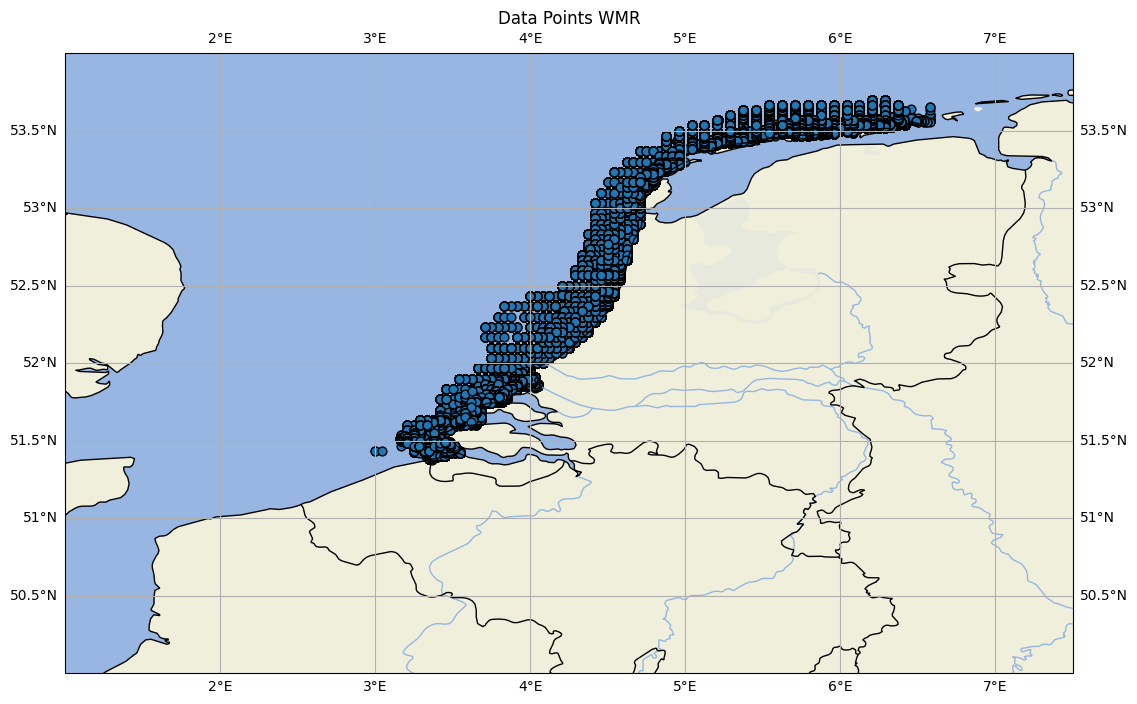

In [10]:
# Create a Cartopy plot
fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([1, 7.5, 50, 54], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_WMR['LONGITUDE'], df_WMR['LATITUDE'], s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# # 
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a title
plt.title('Data Points WMR')

# Show the plot
plt.show()